Modules 
*   Pandas : for data wrangling
*   numpy: Mathematical computation 
*   matplotlib.pyplot and seaborn : data visualization
*   Train_test_split : splits data intro train data for the model and test data to estimate our model on unknwon data
*   Random forest classifier : method that combines decision trees results for better prediction
*   Metrics : Since we are dealing with a regression problem(predicting a continous value) we have to evaluate our model with specific metrics such as RMSE ...

*   RandomizedSearchCV: For hyperparameter tunning.for increasing the accuracy of the model during his fitting to the trainning data. 












In [127]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [81]:
train_data = pd.read_excel('/content/drive/MyDrive/dataset/Data_Train.xlsx', engine='openpyxl')
train_data.shape


(10683, 11)

In [82]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Let's get our hands dirty with our imported Data 
1. Missing values 

In [24]:
train_data.isnull().any()


Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [25]:
train_data.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since we have only 2 NAs we can just drop them.It will not affect the distribution of our data.

In [83]:
train_data.dropna(inplace = True)


Now let's begin our data exploration.
Let's analyse our columns.


In [31]:
print(" Columns in our datasset are :" ,train_data.columns)

 Columns in our datasset are : Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [32]:
print( " columns type are :",train_data.dtypes)

 columns type are : Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


Now let's change object types to datetimes

In [84]:
def change_to_datetime(column):
    train_data[column] = pd.to_datetime(train_data[column])
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(i)

In [85]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month
train_data.drop('Date_of_Journey', axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-25 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-25 05:50:00,2022-09-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-25 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-25 18:05:00,2022-09-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-25 16:50:00,2022-09-25 21:35:00,4h 45m,1 stop,No info,13302,3,1



Now it's time for feature engineering :
Let's extract hours and minutes from every column and drop it 

In [86]:
def extract_hour(df, col):
    df[col+'_hour'] = df[col].dt.hour
    
def extract_minute(df, col):
    df[col + '_minute'] = df[col].dt.minute

def drop_column(df, col):
    df.drop(col, axis = 1, inplace = True)
extract_hour(train_data, 'Dep_Time')
extract_minute(train_data, 'Dep_Time')

extract_hour(train_data, 'Arrival_Time')
extract_minute(train_data, 'Arrival_Time')
drop_column(train_data, 'Dep_Time')
drop_column(train_data, 'Arrival_Time')
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Calculating the duration is a important feature for predicting fare prices 
More pricesly we are going to need hours and minutes seprately


In [87]:
duration = list(train_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' ')) == 2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i] 
train_data['Duration'] = duration
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Furthermore, let's separate hours and minutes from duration

In [88]:
def hour(x):
    return x.split(' ')[0][:-1]

def minute(x):
    return x.split(' ')[1][:-1]
train_data['Duration_hour'] = train_data['Duration'].apply(hour)
train_data['Duration_minute'] = train_data['Duration'].apply(minute)
train_data.drop('Duration', axis = 1,  inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [89]:
train_data.dtypes


Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hour          object
Duration_minute        object
dtype: object

In [90]:
train_data['Duration_hour'] = train_data['Duration_hour'].astype(int)
train_data['Duration_minute'] = train_data['Duration_minute'].astype(int)

A good idea will be seperating factor columns and integer columns because categorical features are not understandable by machine learning algorithms.

In [91]:
object_col = [i for i in train_data.columns if train_data[i].dtype == 'O']
object_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [92]:
int_col = [i for i in train_data.columns if train_data[i].dtype != 'O']
int_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hour',
 'Duration_minute']

Categorical data processing 
We are dealing with two types of data
*   Nominal data : No partical order like the country column
*  Ordinal Data : Ordinal Data are those data which have some kind of hierarchy.





In [93]:
categorical_data = train_data[object_col]
categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


Process one hot encoding on categorical columns


In [94]:
Airline = pd.get_dummies(categorical_data['Airline'], drop_first = True)
Source = pd.get_dummies(categorical_data['Source'], drop_first = True)
Destination = pd.get_dummies(categorical_data['Destination'], drop_first  = True)


We can see that Route column has some specific format that we must handle.

In [95]:
categorical_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [96]:
categorical_data['Route_01'] = categorical_data['Route'].str.split('→').str[0]
categorical_data['Route_02'] = categorical_data['Route'].str.split('→').str[1]
categorical_data['Route_03'] = categorical_data['Route'].str.split('→').str[2]
categorical_data['Route_04'] = categorical_data['Route'].str.split('→').str[3]
categorical_data['Route_05'] = categorical_data['Route'].str.split('→').str[4]

In [97]:
categorical_data.drop('Route', axis = 1 , inplace = True)
categorical_data.head()


,Airline,Source,Destination,Total_Stops,Additional_Info,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


This method generated some unusefull NANs we can just drop them

In [98]:
for i in ['Route_03', 'Route_04', 'Route_05']:
    categorical_data[i].fillna('None', inplace = True)

In [99]:
from sklearn.preprocessing import LabelEncoder
categorical_data.head()
encoder = LabelEncoder()
for i in ['Route_01', 'Route_02', 'Route_03', 'Route_04', 'Route_05']:
    categorical_data[i] = encoder.fit_transform(categorical_data[i])
categorical_data.head()
categorical_data.drop('Additional_Info', inplace = True, axis = 1)
categorical_data.head()



,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5


Now let's explore the "Total stops" column

In [100]:
dict_stop = {'non-stop':0, 
              '2 stops':2, 
              '1 stop':1, 
              '3 stops':3, 
              '4 stops':4 }
categorical_data['Total_Stops'] =  categorical_data['Total_Stops'].map(dict_route)
categorical_data.head()


,Airline,Source,Destination,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


Let's add the airline , source , destination columns we all ready encoded with dummies function

In [101]:
train_data = pd.concat([categorical_data, Airline, Source, Destination, train_data[int_col]], axis = 1)
train_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)
train_data.head()


,Total_Stops,Route_01,Route_02,Route_03,Route_04,Route_05,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hour,Duration_minute
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


Now we focus on outliers 

In [102]:
def plot(df, col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)

In [102]:
train_data.drop("Additional_Info")


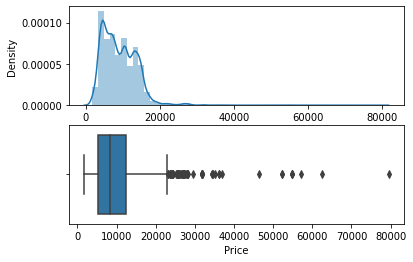

In [103]:
plot(train_data, 'Price')


Now let's seperate the dependant variable we want to predict from the data

In [109]:
X = train_data.drop('Price', axis = 1)
Y=train_data["Price"]

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41)
X_train.shape

(8011, 34)

In [118]:
Y_train.shape

(8011,)

In [124]:
model = RF(max_depth=100, random_state=0)
model.fit(X_train,Y_train)


RandomForestRegressor(max_depth=100, random_state=0)

Training Score: 0.956435777655755
Predictions are: [ 5930.61        6235.765       6674.8325     ...  9759.41
  3492.60533333 12703.83      ]


R2 score is: 0.7904646559084936
MAE: 1165.741803335678
MSE: 4251554.927875091
MSE: 34.14296125610194


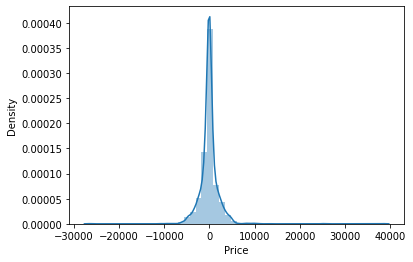

In [125]:
print('Training Score: {}'.format(model.score(X_train, Y_train)))
predictions = model.predict(X_test)
print('Predictions are: {}'.format(predictions))
print('\n')
r2_score = metrics.r2_score(Y_test, predictions)
print('R2 score is: {}'.format(r2_score))
MAE = metrics.mean_absolute_error(Y_test, predictions)
print('MAE: {}'.format(MAE))
MSE = metrics.mean_squared_error(Y_test, predictions)
print('MSE: {}'.format(MSE))
rmse = np.sqrt(MAE)
print('MSE: {}'.format(rmse))
sns.distplot(Y_test - predictions)

We see the distribution of the biais function is a normal distribution with a low std deviation which is a good measure 

Cross validation: We give a range for number of trees and max_depth of the tree since random classifier is a decision tree combiner 

In [131]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 6)]
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 4)]
random_grid = {
    'n_estimators' : n_estimators,
    'max_features': ['auto', 'sqrt'],
    'max_depth' : max_depth,
    'min_samples_split': [5, 10, 10, 100]
}
second_model=RF()
rf_random = RandomizedSearchCV(estimator = second_model, param_distributions = random_grid, cv = 3, verbose = 2,
                  n_jobs = -1 )
rf_random.fit(X_train, Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 10, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [132]:
rf_random.best_params_


{'n_estimators': 320,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 13}

Now let's create a model based on what we have from the grid search : 

In [134]:
final_model=RF(n_estimators=320,min_samples_split=10,max_features="auto",max_depth=13)
final_model.fit(X_train,Y_train)


RandomForestRegressor(max_depth=13, min_samples_split=10, n_estimators=320)

R2 score is: 0.8181702054665728
MAE: 1142.3264105530877
MSE: 3689398.3797096484
MSE: 33.79831964096866


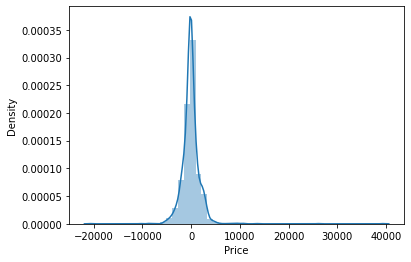

In [137]:
predictions_test_final = final_model.predict(X_test)
r2_score = metrics.r2_score(Y_test, predictions_test_final)
print('R2 score is: {}'.format(r2_score))
MAE = metrics.mean_absolute_error(Y_test, predictions_test_final)
print('MAE: {}'.format(MAE))
MSE = metrics.mean_squared_error(Y_test, predictions_test_final)
print('MSE: {}'.format(MSE))
rmse = np.sqrt(MAE)
print('MSE: {}'.format(rmse))
sns.distplot(Y_test - predictions_test_final)

